<center><h2> Lorentz Attractors </h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
<p>
Lorenz attractor equations are solved with Runge-Kutta.
    <p>
$$
\dot x =\sigma (y-x) ,\ \ 
\dot y =\rho x-x z-y ,\ \ \dot z = xy-\beta z.
$$

<IPython.core.display.Javascript object>


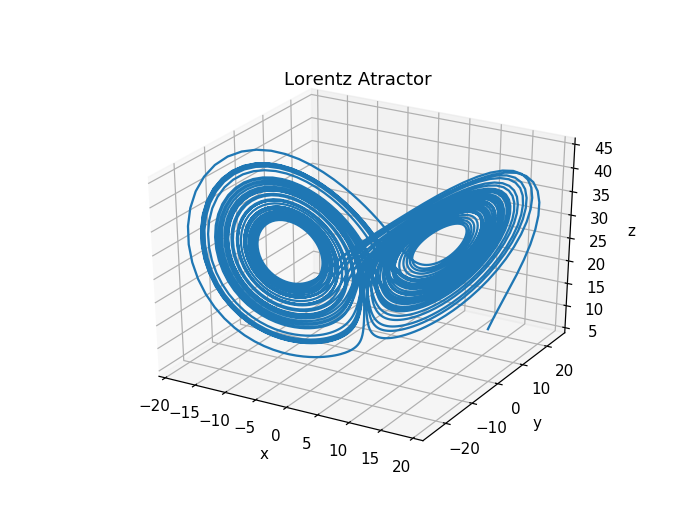

In [1]:
%matplotlib notebook

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

tt = np.zeros((5000),float)            # for time
xx = np.zeros((5000),float)            # for oscillator position
yy = np.zeros((5000),float)            # for velocity
zz = np.zeros((5000),float)            # for oscillator position

def f(t,y):        # RHS of equation
    rhs = [0]*(3)   
    sigma = 10.    # constants 
    b =  8./3.
    r = 28
    rhs[0] = -sigma*(y[0]-y[1])    # xdot =  -sigma*(x-y)
    rhs[1] = r*y[0]-y[1]-y[0]*y[2] # ydot = r*x-y-x*z
    rhs[2] = -b*y[2]+y[0]*y[1]     # zdot = -b*z+x*y
    return rhs
    
def rk4(t,h,y,n):        
    k1 = [0.]*(n+1)
    k2 = [0.]*(n+1)
    k3 = [0.]*(n+1)
    k4 = [0.]*(n+1)
    fR = [0.]*(n+1)
    ydumb = [0.]*(n+1)
    fR = f(t, y)                  # function returns rhs
    for i in range(0,n+1):  k1[i]  =  h*fR[i]              
    for i in range(0, n+1): ydumb[i]  =  y[i] + k1[i]/2.  
    fR = f(t + h/2.,ydumb)
    for i in range(0, n+1):
        k2[i] = h*fR[i]
        ydumb[i]  =  y[i] + k2[i]/2.    
    fR = f(t + h/2., ydumb)
    for i in range(0, n+1):
        k3[i] = h*fR[i]
        ydumb[i]  =  y[i] + k3[i] 
    fR = f(t + h, ydumb)
    for i in range(0, n+1):
        k4[i] = h*fR[i]
        ydumb[i]  =  y[i] + k4[i] 
    for i in range(0, n+1):
        y[i]  =  y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6. # runge kutta
    return y

dt = 0.01            
y = [0]*(3)
y[0] = 15    # init x
y[1] = 10    # init y
y[2] = 7     # init z
f(0,y)     # initial function
i = 0

for t in np.arange(0,50,dt):
    r = rk4(t,dt,y,2)    # call runge kutta   
    xx[i] = r[0]
    yy[i] = r[1]
    zz[i] = r[2]
    i += 1
    
fig =  plt.figure()
ax  =  fig.gca(projection = '3d')
ax.plot(xx, yy, zz) 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Lorentz Attractor')
plt.show()